In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
data=pd.read_csv(r"C:\Users\pudhi\Downloads\Compressed\Athletes Match Data.csv")

In [2]:
data.shape

(8322, 18)

In [4]:
data.dtypes

Match Number               float64
Tournament                  object
Tournament L               float64
Location                    object
Location L                 float64
Court                       object
Court L                    float64
Player                      object
Player L                   float64
Opponent                    object
Opponent L                 float64
Result                      object
Result L                   float64
Player Age                 float64
Player 1st Serve Won         int64
Player 1st Serve Fault     float64
PS Binned                   object
dtype: object

In [5]:
data.describe(include="all")

,Match Number,Tournament,Tournament L,Location,Location L,Court,Court L,Player,Player L,Opponent,Opponent L,Result,Result L,Player Age,Player 1st Serve Won,Player 1st Serve Fault,PS Binned
count,8322.000000,8322,8322.000000,8322,8322.000000,8322,8322.000000,8322,8322.000000,8322,8322.000000,8322,8322.000000,9340.000000,9340.000000,8322.000000,8322
unique,NaN,162,NaN,116,NaN,2,NaN,31,NaN,660,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,US Open,NaN,Paris,NaN,Outdoor,NaN,Djokovic N.,NaN,Kerber A.,NaN,Win,NaN,NaN,NaN,NaN,Low
freq,NaN,503,NaN,616,NaN,7290,NaN,487,NaN,95,NaN,5233,NaN,NaN,NaN,NaN,6860
mean,4456.484018,NaN,76.485580,NaN,58.476568,NaN,0.875991,NaN,14.746936,NaN,331.737203,NaN,0.628815,26.818893,29.841863,0.379571,NaN
std,2705.369837,NaN,51.524045,NaN,36.893797,NaN,0.329611,NaN,9.049498,NaN,184.279239,NaN,0.483151,4.120062,16.811112,0.078855,NaN
min,1.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,15.709788,0.000000,0.088889,NaN
25%,2106.250000,NaN,30.000000,NaN,19.000000,NaN,1.000000,NaN,6.000000,NaN,176.000000,NaN,0.000000,23.682409,21.000000,0.326087,NaN
50%,4268.500000,NaN,65.000000,NaN,64.000000,NaN,1.000000,NaN,14.000000,NaN,343.000000,NaN,1.000000,26.606434,29.000000,0.378442,NaN
75%,6785.750000,NaN,134.000000,NaN,91.000000,NaN,1.000000,NaN,22.000000,NaN,493.000000,NaN,1.000000,29.342231,39.000000,0.431818,NaN


In [11]:
data.dropna(axis=0,inplace=True)

In [27]:
data["Best of"]=data["Best of"]/data["Best of"].max()
data["Player Rank"]=data["Player Rank"]/data["Player Rank"].max()
data["Opponent Rank"]=data["Opponent Rank"]/data["Opponent Rank"].max()
data["Player Ranking Points"]=data["Player Ranking Points"]/data["Player Ranking Points"].max()
data["Opponent Ranking Points"]=data["Opponent Ranking Points"]/data["Opponent Ranking Points"].max()
data["Player Double Faults"]=data["Player Double Faults"]/data["Player Double Faults"].max()
data["Player Age"]=data["Player Age"]/data["Player Age"].max()
data["Player Serves"]=data["Player Serves"]/data["Player Serves"].max()
data["Player 1st Serve Won"]=data["Player 1st Serve Won"]/data["Player 1st Serve Won"].max()

In [12]:
data.to_csv(r"C:\Users\pudhi\Downloads\Compressed\Athletes Match Data.csv",index=None,header=True)

In [41]:
bins=np.linspace(min(data["Player Serves"]),max(data["Player Serves"]),4)
grp_names=["Low","Medium","High"]
data["PS Binned"]=pd.cut(data["Player Serves"],bins,labels=grp_names,include_lowest=True)

(array([8.200e+01, 2.756e+03, 3.264e+03, 1.706e+03, 3.770e+02, 9.600e+01,
        2.800e+01, 9.000e+00, 2.000e+00, 2.000e+00]),
 array([0.01030928, 0.10927835, 0.20824742, 0.30721649, 0.40618557,
        0.50515464, 0.60412371, 0.70309278, 0.80206186, 0.90103093,
        1.        ]),
 <a list of 10 Patch objects>)

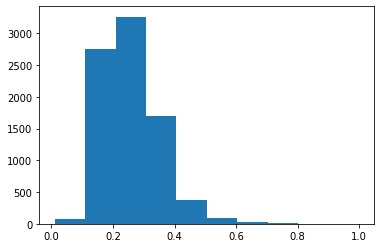

In [7]:
plt.hist(data["Player Serves"])

In [8]:
data["PS Binned"].value_counts()

Low       6860
Medium    1443
High        19
Name: PS Binned, dtype: int64

In [53]:
num = LabelEncoder()
data['Series'] = num.fit_transform(data['Series'].astype('str'))
data['Tournament'] = num.fit_transform(data['Tournament'].astype('str'))
data['Location'] = num.fit_transform(data['Location'].astype('str'))
data['Court'] = num.fit_transform(data['Court'].astype('str'))
data['Surface'] = num.fit_transform(data['Surface'].astype('str'))
data['Round'] = num.fit_transform(data['Round'].astype('str'))
data['Player'] = num.fit_transform(data['Player'].astype('str'))
data['Opponent'] = num.fit_transform(data['Opponent'].astype('str'))
data['Result'] = num.fit_transform(data['Result'].astype('str'))

In [7]:
data.head()

,Match Number,Tournament,Tournament L,Location,Location L,Court,Court L,Player,Player L,Opponent,Opponent L,Result,Result L,Player Age,Player 1st Serve Won,Player 1st Serve Fault,PS Binned
0,1,Qatar Exxon Mobil Open,141,Doha,64,Outdoor,1,Karlovic I.,12,Stakhovsky S.,516,Win,1,32.843258,52,0.346535,Medium
1,2,Qatar Exxon Mobil Open,141,Doha,64,Outdoor,1,Karlovic I.,12,Youzhny M.,600,Loss,0,32.843258,41,0.307692,Low
2,3,Australian Open,153,Melbourne,103,Outdoor,1,Karlovic I.,12,Melzer J.,331,Win,1,32.881588,61,0.221154,Medium
3,4,Australian Open,153,Melbourne,103,Outdoor,1,Karlovic I.,12,Berlocq C.,423,Win,1,32.881588,63,0.340909,Medium
4,5,Australian Open,153,Melbourne,103,Outdoor,1,Karlovic I.,12,Federer R.,91,Loss,0,32.881588,63,0.302521,Medium


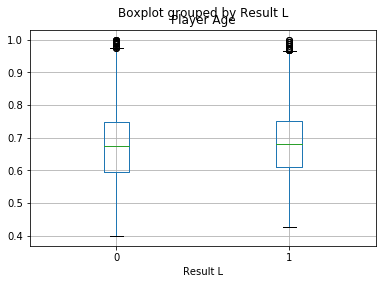

In [10]:
data.boxplot(column="Player Age",by="Result L")

In [4]:
d=data[1:150]
x=d['Player Age']
y=d['Player Rank']
plt.scatter(x,y)

KeyError: 'Player Rank'

In [5]:
d = data[['Tournament', 'Player ', 'Player 1st Serve Won']]
d_grp = d.groupby(['Tournament','Player '],as_index=False).mean()
d_pivot = d_grp.pivot(index = 'Tournament', columns = 'Player ')
d_pivot

Player 1st Serve Won  \
Player                                                   Anderson K.   
Tournament                                                             
ABN AMRO World Tennis Tournament                                 NaN   
AEGON Championships                                        37.285714   
AEGON Classic                                                    NaN   
AEGON International                                        43.666667   
AEGON Open                                                 46.000000   
ASB Classic                                                36.000000   
Abierto Mexicano                                           48.285714   
Abierto Mexicano Mifel                                           NaN   
Aegon Open                                                       NaN   
Antalya Open                                                     NaN   
Apai International                                               NaN   
Apia International                                         38.400000   
Argentina Open                                                   NaN   
Australian Open                                            38.823529   
BB&T Atlanta Open                                          41.875000   
BGL BNP Paribas Luxembourg Open                                  NaN   
BMW Open                                                         NaN   
BNP Paribas Katowice Open                                        NaN   
BNP Paribas Masters                                        44.307692   
BNP Paribas Open                                           36.611111   
BNP Paribas WTA Finals                                           NaN   
BRD Nastase Tiriac Trophy                                        NaN   
Baku Cup                                                         NaN   
Bank of the West Classic                                         NaN   
Barcelona Ladies Open                                            NaN   
Bell Challenge                                                   NaN   
Brasil Tennis Cup                                                NaN   
Brisbane International                                     35.000000   
Brussels Open                                                    NaN   
Bucharest Open                                                   NaN   
...                                                              ...   
SkiStar Swedish Open                                             NaN   
Sony Ericsson Championships                                      NaN   
Sony Ericsson Open                                         42.800000   
Sony Swedish Open                                                NaN   
Southern California Open                                         NaN   
St. Petersburg Open                                              NaN   
Stockholm Open                                             36.250000   
Swiss Indoors                                              45.400000   
Sydney International                                             NaN   
TEB BNP Paribas Istanbul Cup                                     NaN   
Taiwan Open                                                      NaN   
Tashkent Open                                                    NaN   
Texas Tennis Open                                                NaN   
Thailand Open                                              84.000000   
Tianjin Open                                                     NaN   
Topshelf Open                                                    NaN   
Toray Pan Pacific Open                                           NaN   
U.S. Men's Clay Court Championships                        25.428571   
U.S. National Indoor Tennis Championships                        NaN   
US National Indoor Tennis Championships                          NaN   
US Open                                                    54.400000   
Unicef Open                                                      NaN   
Valencia Open 50

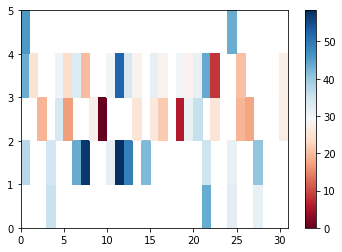

In [6]:
plt.pcolor(d_pivot.head(), cmap = 'RdBu')
plt.colorbar()
plt.show()

(0, 1.051049760455677)

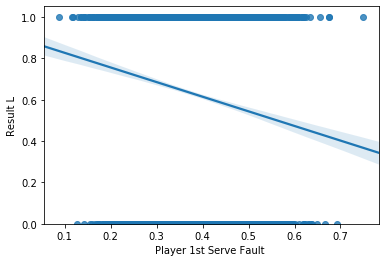

In [3]:
sns.regplot(x="Player 1st Serve Fault ",y="Result L", data=data)
plt.ylim(0,)

In [11]:
corr,p = pearsonr(data['Result L'],data['Player Age'])
print(corr)
print(p)

-0.022556285062714985
0.0396237722270272


In [13]:
corr,p = pearsonr(data['Result L'],data['Player 1st Serve Won'])
print(corr)
print(p)

0.013446490514695736
0.22000033305819408


In [15]:
corr,p = pearsonr(data['Result L'],data['Player 1st Serve Fault '])
print(corr)
print(p)

-0.11544418301045552
4.3226414068046146e-26


In [6]:
df=data[data['Player L']==12]
d = df[['Surface', 'Player L', 'Result L']]
d_grp = d.groupby(['Surface','Player L'],as_index=False).mean()
d_pivot = d_grp.pivot(index = 'Surface', columns = 'Player L')
d_pivot

,Result L
Player L,12.0
Surface,
Clay,0.413793
Grass,0.622642
Hard,0.535912


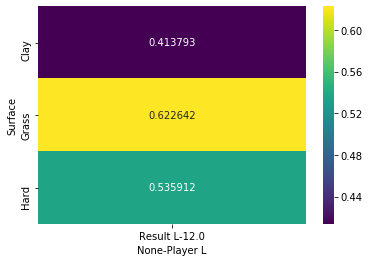

In [15]:
sns.heatmap(d_pivot, annot=True, fmt="g", cmap='viridis')
plt.show()

In [11]:
df=data[data['Player L']==21]
d = df[['Surface', 'Player ', 'Result L']]
d_grp = d.groupby(['Surface','Player '],as_index=False).mean()
d_pivot = d_grp.pivot(index = 'Surface', columns = 'Player ')
d_pivot

,Result L
Player,Raonic M.
Surface,
Clay,0.682927
Grass,0.666667
Hard,0.706564


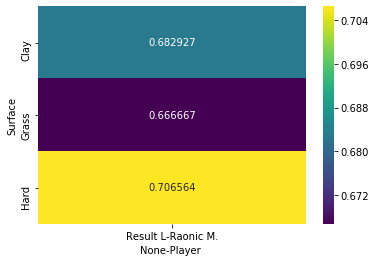

In [12]:
sns.heatmap(d_pivot, annot=True, fmt="g", cmap='viridis')
plt.show()

In [4]:
float_array = data[['Player Age','Player 1st Serve Won','Player 1st Serve Fault ']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df = pd.DataFrame(scaled_array)
df

,0,1,2
0,0.722716,0.304094,0.389716
1,0.722716,0.239766,0.330963
2,0.724333,0.356725,0.200065
3,0.724333,0.368421,0.381207
4,0.724333,0.368421,0.323141
5,0.725950,0.163743,0.453782
6,0.725950,0.169591,0.325904
7,0.725950,0.397661,0.127343
8,0.729184,0.111111,0.605757
9,0.729992,0.122807,0.389140


In [7]:
x_data = df[[0,1,2]]
y_data = data['Result L']
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
yhat_train = lr.predict(x_train)
yhat_train[0:5]

array([0.52066108, 0.67929983, 0.60530796, 0.67057599, 0.73096803])

In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

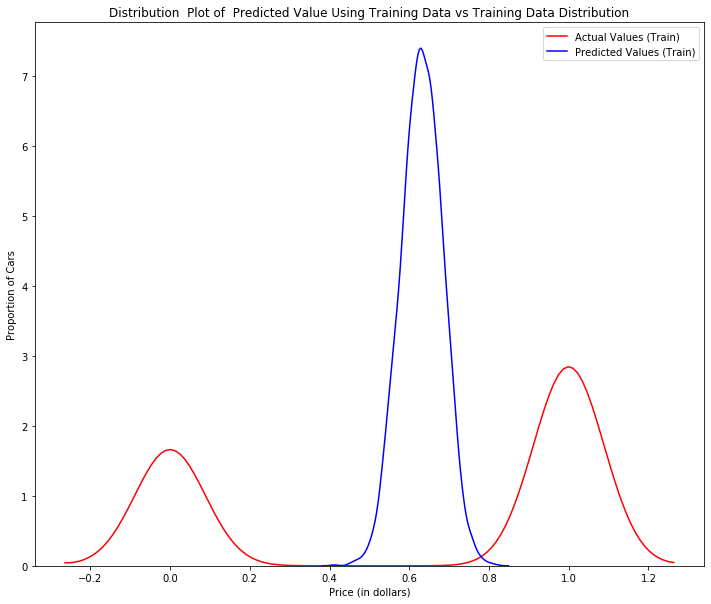

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 520  880]
 [ 735 1610]]
              precision    recall  f1-score   support

         0.0       0.41      0.37      0.39      1400
         1.0       0.65      0.69      0.67      2345

    accuracy                           0.57      3745
   macro avg       0.53      0.53      0.53      3745
weighted avg       0.56      0.57      0.56      3745



In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    print(round(acc_knn,2,), "%")

99.98 %
76.62 %
77.63 %
71.33 %
72.14 %
69.63 %
68.52 %
67.36 %
67.77 %


Text(0, 0.5, 'Mean Error')

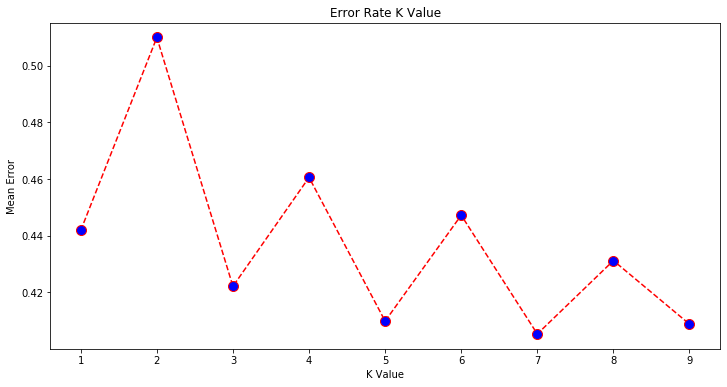

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [22]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[[0]])
x_test_pr = pr.fit_transform(x_test[[0]])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [23]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([0.63770264, 0.63040596, 0.63491291, 0.63106655, 0.63166046])

In [25]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [0.63770264 0.63040596 0.63491291 0.63106655]
True values: [1. 1. 1. 1.]


In [26]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-1,3])
    plt.ylabel('Result')
    plt.legend()

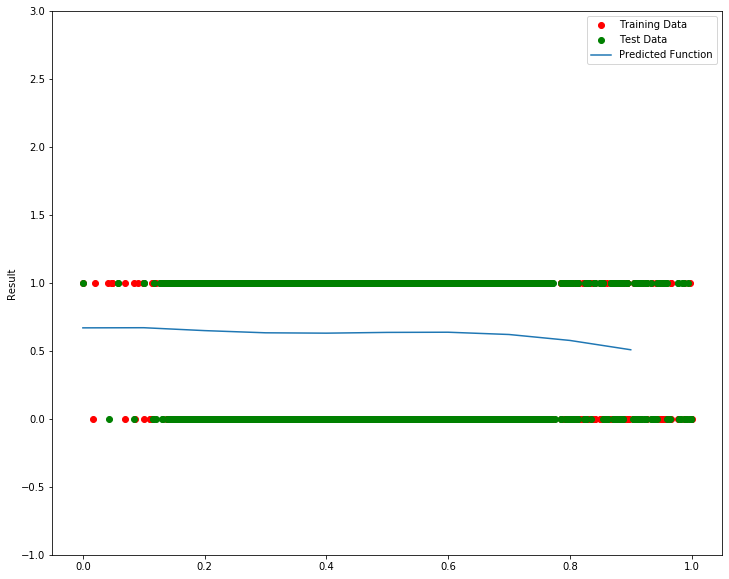

In [27]:
PollyPlot(x_train[[0]], x_test[[0]], y_train, y_test, poly,pr)

In [21]:
poly.score(x_train_pr, y_train)

0.0022049202211821273

In [22]:
poly.score(x_test_pr, y_test)

0.0015861575075598602

Text(3, 0.75, 'Maximum R^2 ')

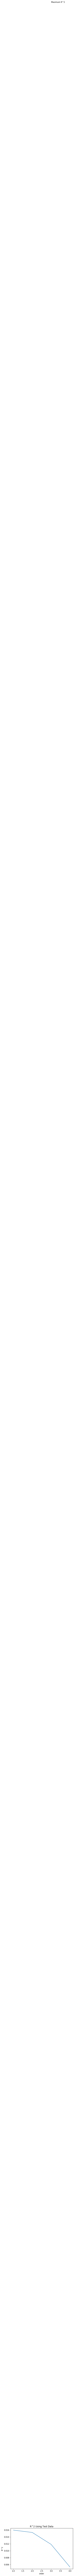

In [23]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [24]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[[0]])
    x_test_pr = pr.fit_transform(x_test[[0]])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[[0]], x_test[[0]], y_train,y_test, poly, pr)

In [25]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
interact(f, order=(0, 50, 1), test_data=(0.05, 0.95, 0.05))

D:\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=25, description='order', max=50), FloatSlider(value=0.45, description='t…

<function __main__.f(order, test_data)>

In [26]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [27]:
from sklearn.linear_model import Ridge

In [28]:
RigeModel=Ridge(alpha=0.1)

In [29]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
yhat = RigeModel.predict(x_test_pr)

In [31]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [0.62606476 0.68969521 0.60480211 0.4341248 ]
test set : [1 1 1 1]


In [32]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

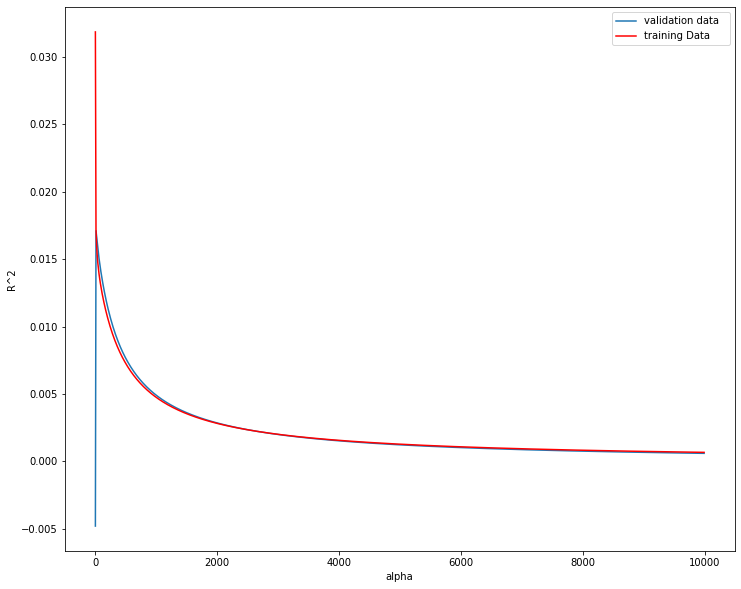

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [36]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [38]:
Grid1.fit(x_data, y_data)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
BestRR.score(x_test, y_test)

0.01251060995026243